In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
df=pd.read_csv('loan_data.csv')

In [123]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [124]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [125]:
purpose_df=pd.get_dummies(df['purpose'],drop_first=True)
df=pd.concat([df,purpose_df],axis=1)


In [126]:
df.drop(['purpose'],axis=1,inplace=True)

In [127]:
purpose_df=pd.concat([purpose_df,df['not.fully.paid']],axis=1)
X=purpose_df.drop(['not.fully.paid'],axis=1)
#X=df.drop(['not.fully.paid'],axis=1)
y=purpose_df['not.fully.paid']
df.dropna(inplace=True)
purpose_df

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,not.fully.paid
0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0
6,0,1,0,0,0,0,1
7,0,0,0,0,0,0,1
8,0,0,0,1,0,0,0
9,0,1,0,0,0,0,0


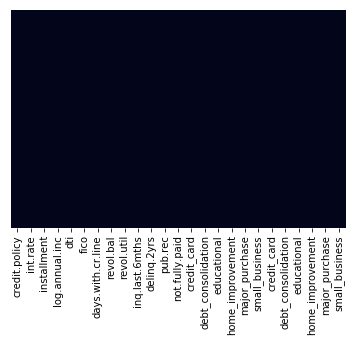

In [94]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

# using single decision tree

In [129]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions=dtree.predict(X_test)

In [130]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[2431    0]
 [ 443    0]]
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.00      0.00      0.00       443

avg / total       0.72      0.85      0.78      2874



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# using random forest

In [131]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
rfc_predictions=rfc.predict(X_test)

In [132]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,rfc_predictions))
print(classification_report(y_test,rfc_predictions))

[[2431    0]
 [ 443    0]]
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.00      0.00      0.00       443

avg / total       0.72      0.85      0.78      2874



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
